<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Pantea Amoie

**Student ID**: 400101656




## Importing Libraries

First we import libraries that we need for this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# import any other libraries needed below

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [2]:
X, Y = None, None

data1 = pd.read_csv('data_logistic.csv')
data3 = pd.read_csv('data3_logistic.csv')

# Extract X and Y from the dataset
X = data3[['X1', 'X2', 'X3']].values
Y = data3['Y'].values

# we can have the same thing for the first dataset
# X2 = data1[['X1', 'X2', 'X3']].values
# Y2 = data1['Y'].values

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**: Normalizing rescales each feature to a common range, making them directly comparable. Features with a broad range of values can excessively influence the model, simply because their variation overwhelms more subtle effects from other features. Normalization rescales these ranges to be more uniform. Optimization algorithms like gradient descent take steps proportional to the gradient to minimize the loss function. If features vary greatly in scale, this can cause unstable updates. Normalization helps rescale the gradients to be more uniform, improving convergence. Without normalization, regularization penalties may unfairly penalize certain features simply because they have larger scales.

In [3]:
# Calculate the mean & std along the columns 

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std
print(X_norm)

[[-1.49325465 -1.16910378 -0.832399  ]
 [-0.8759156  -0.75095122  0.96152516]
 [ 0.72311888  0.33215587 -0.70781649]
 ...
 [-0.60867019  0.51514699 -1.44022832]
 [ 0.29125847  0.25286776 -1.97069064]
 [-1.71436638  1.22265772 -0.13142589]]


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [4]:
ones = np.ones((X_norm.shape[0], 1))
X = np.hstack((ones, X_norm))
print(X.shape)

(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [5]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    return (1 / (1 + np.exp(-Z)))



### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [6]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    
    n, d = X.shape
    loss = 0
    
    a = np.dot(X, theta)
    h = sigmoid(a)
    loss = np.sum(- y * np.log(h) - (1 - y) * np.log(1 - h)) / n
    loss += (regLambda / 2) * np.sum(np.square(theta[1:])) 
    
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:

$$J(\theta) = -\sum_{i=1}^{n} [y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)}))] + \lambda\theta_j$$

$$
\frac{\partial}{\partial \theta_j} h_{\theta}(x^{(i)}) = h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))(x_j^{(i)})
$$

$$ 
\frac{\partial J(\theta)}{\partial \theta_j} = - \sum_{i=1}^{n} \left[ y^{(i)} \frac{1}{h_{\theta}(x^{(i)})} h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))(x_j^{(i)}) - (1 - y^{(i)}) \frac{1}{1 - h_{\theta}(x^{(i)})} h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))(x_j^{(i)})  \right] + \lambda\theta_j
$$

$$
\frac{\partial J(\theta)}{\partial \theta_j}= \sum_{i=1}^{n} \left[ (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} \right] + \lambda\theta_j
$$



In [7]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''
    
    n, d = X.shape
    grad = np.zeros(d)
    
    a = np.dot(X, theta)
    h = sigmoid(a)
    for i in range(d) :
        grad[i] = np.sum((h - y) * X[:, i])
        if i != 0:
            grad[i] += regLambda * theta[i]
    grad /= n
    
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [8]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    
    n, d = X.shape
    theta = np.zeros(d)
    loss_history = []
    
    for i in range(maxNumIters):
        
        theta_new = theta - alpha * computeGradient(theta, X, y, regLambda)
        if hasConverged(theta, theta_new, epsilon):
            break
        
        theta = theta_new
        loss_history.append(computeCost(theta, X, y, regLambda))
    
    return theta, loss_history



def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    
    if np.linalg.norm(theta_new - theta_old) <= epsilon:
        return True
    
    
    return False


Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [9]:
theta, loss_history = fit(X, Y) 
iter_number = len(loss_history)
for i in range(iter_number):
    print("Iteration", (i+1), ":", loss_history[i])

print("theta:", theta)

Iteration 1 : 0.691608138468224
Iteration 2 : 0.6900770178354944
Iteration 3 : 0.6885537780939257
Iteration 4 : 0.6870383787383006
Iteration 5 : 0.6855307793290484
Iteration 6 : 0.6840309394952236
Iteration 7 : 0.6825388189374362
Iteration 8 : 0.681054377430723
Iteration 9 : 0.6795775748273689
Iteration 10 : 0.6781083710596757
Iteration 11 : 0.6766467261426754
Iteration 12 : 0.6751926001767927
Iteration 13 : 0.6737459533504544
Iteration 14 : 0.672306745942646
Iteration 15 : 0.6708749383254166
Iteration 16 : 0.6694504909663306
Iteration 17 : 0.66803336443087
Iteration 18 : 0.6666235193847815
Iteration 19 : 0.6652209165963764
Iteration 20 : 0.6638255169387753
Iteration 21 : 0.6624372813921063
Iteration 22 : 0.6610561710456487
Iteration 23 : 0.6596821470999299
Iteration 24 : 0.6583151708687698
Iteration 25 : 0.6569552037812793
Iteration 26 : 0.6556022073838043
Iteration 27 : 0.6542561433418274
Iteration 28 : 0.6529169734418157
Iteration 29 : 0.6515846595930248
Iteration 30 : 0.65025916382

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [10]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size=0.2222, random_state=42)

Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [11]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    n, d = X.shape
    prediction = np.dot(X, theta)
    h = sigmoid(prediction)
    
    Y = np.zeros(n)
    for i in range(n):
        if(h[i] > 0.5):
            Y[i] = 1
        else:
            Y[i] = 0
    
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:

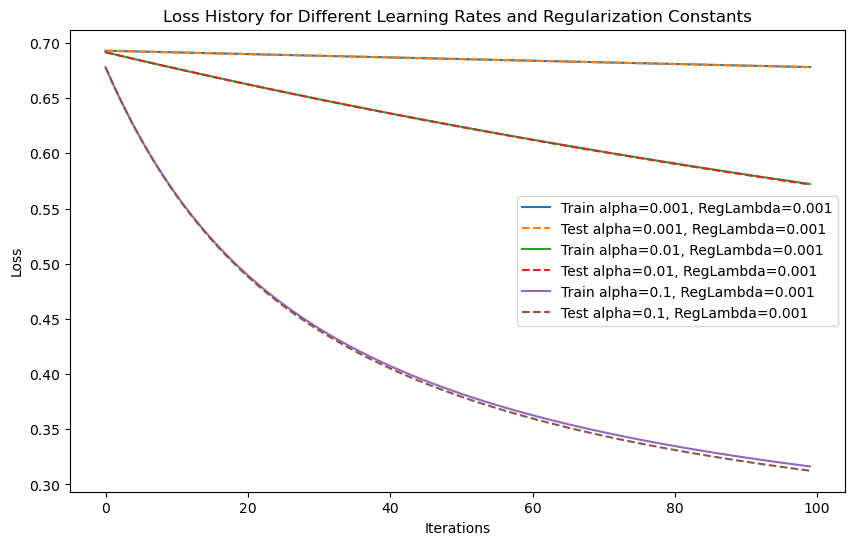

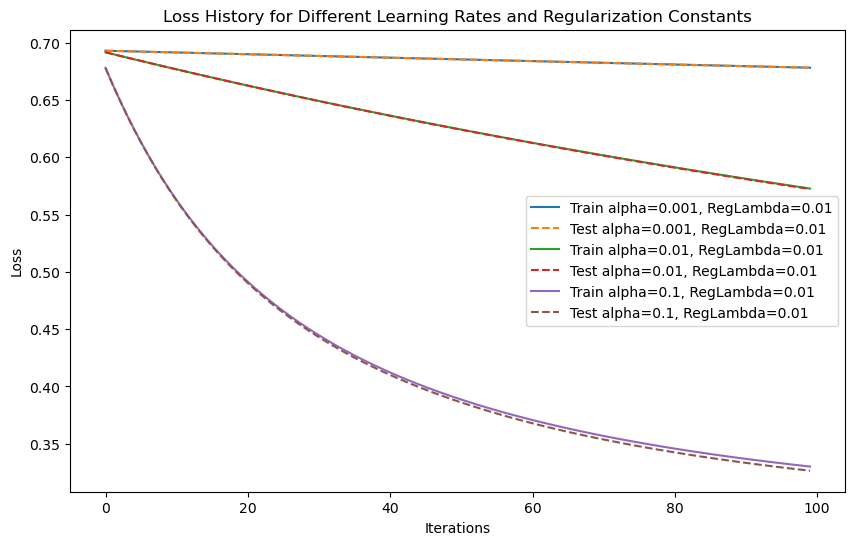

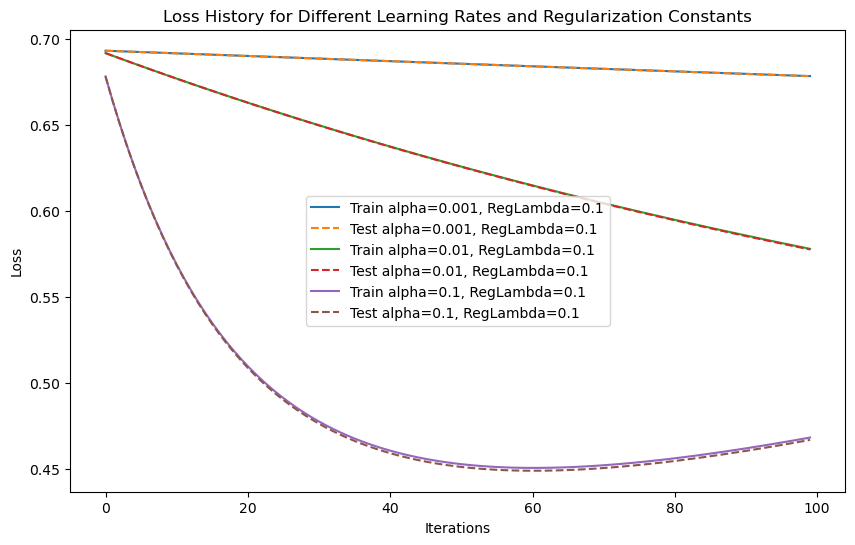

Accuracy:  0.91


In [12]:
train_loss_history = {}
test_loss_history = {}

alpha_values = [0.001, 0.01, 0.1]
regLambda_values = [0.001, 0.01, 0.1]

highest_accuracy = 0
for alpha in alpha_values:
    for regLambda in regLambda_values:
        theta, loss_history1 = fit(X_train, Y_train, regLambda, alpha)
        t, loss_history2 = fit(X_test, Y_test, regLambda, alpha)
        train_loss_history[(alpha, regLambda)] = loss_history1
        test_loss_history[(alpha, regLambda)] = loss_history2
        test_predictions = predict(X_test, theta)
        accuracy = accuracy_score(Y_test, test_predictions)

        if accuracy > highest_accuracy:
            highest_accuracy = accuracy
        
plt.figure(figsize=(10, 6))    
for alpha in [0.001, 0.01, 0.1]:
    for regLambda in [0.001]:
        plt.plot(train_loss_history[(alpha, regLambda)], label=f"Train alpha={alpha}, RegLambda={regLambda}")
        plt.plot(test_loss_history[(alpha, regLambda)], label=f"Test alpha={alpha}, RegLambda={regLambda}", linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History for Different Learning Rates and Regularization Constants')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))    
for alpha in [0.001, 0.01, 0.1]:
    for regLambda in [0.01]:
        plt.plot(train_loss_history[(alpha, regLambda)], label=f"Train alpha={alpha}, RegLambda={regLambda}")
        plt.plot(test_loss_history[(alpha, regLambda)], label=f"Test alpha={alpha}, RegLambda={regLambda}", linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History for Different Learning Rates and Regularization Constants')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))    
for alpha in [0.001, 0.01, 0.1]:
    for regLambda in [0.1]:
        plt.plot(train_loss_history[(alpha, regLambda)], label=f"Train alpha={alpha}, RegLambda={regLambda}")
        plt.plot(test_loss_history[(alpha, regLambda)], label=f"Test alpha={alpha}, RegLambda={regLambda}", linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History for Different Learning Rates and Regularization Constants')
plt.legend()
plt.show()

print("Accuracy: ", highest_accuracy)

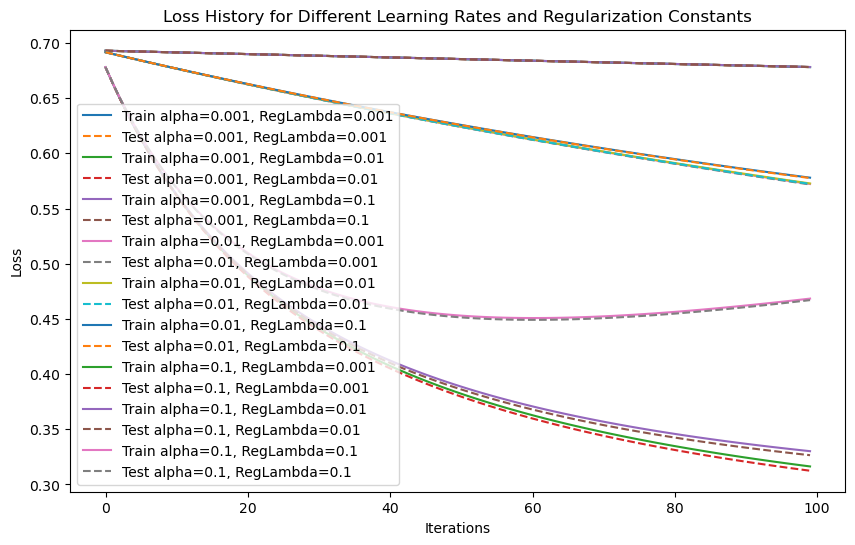

In [13]:
plt.figure(figsize=(10, 6))    
for alpha in alpha_values:
    for regLambda in regLambda_values:
        plt.plot(train_loss_history[(alpha, regLambda)], label=f"Train alpha={alpha}, RegLambda={regLambda}")
        plt.plot(test_loss_history[(alpha, regLambda)], label=f"Test alpha={alpha}, RegLambda={regLambda}", linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History for Different Learning Rates and Regularization Constants')
plt.legend()
plt.show()

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.894

In [14]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)
Y_predicted = gnb_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_predicted)
print("Accuracy: ", accuracy)

Accuracy:  0.894


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.905

In [15]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, Y_train)
Y_predicted = lda_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_predicted)
print("Accuracy: ", accuracy)

Accuracy:  0.905


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:Between the three methods, logistic regression has a higher accuracy so it is the best method. Between LDA and Naive bayes, LDA has a higher accuracy, therefore LDA is a better method than naive bayes.